In [1]:
from base import np

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical layer with inner radii ($r_0$) and thicknesses ($\lambda$), with the restriction $r_0 + \lambda \leq L$.

$$
c_{\text{layer}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 r_0 + 3 \lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

In [2]:
def layer_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_layer(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_layer

### Iterate over thicknesses $(\lambda)$ \& Comsumption Times $(T_c)$

ODEs solved:  60%|█████▉    | 37336/62500 [04:26<02:36, 161.14it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 62500/62500 [07:03<00:00, 147.53it/s]


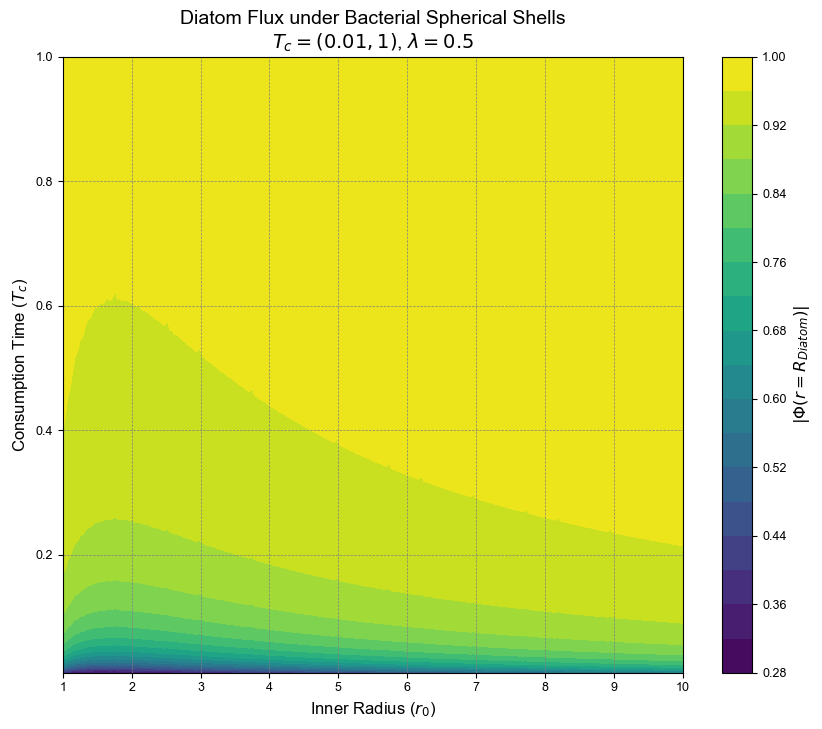

In [3]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': (0.01, 1), #  (1e-3, 1e3)
    'n_Tc' : 250,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_r0': 250,
    'l': 0.5
}

FM_r0 = FluxMap3D(syst_params, layer_generator)
FM_r0.solve(n_jobs=-1)
FM_r0.plot()

ODEs solved: 100%|██████████| 62500/62500 [06:38<00:00, 157.03it/s]


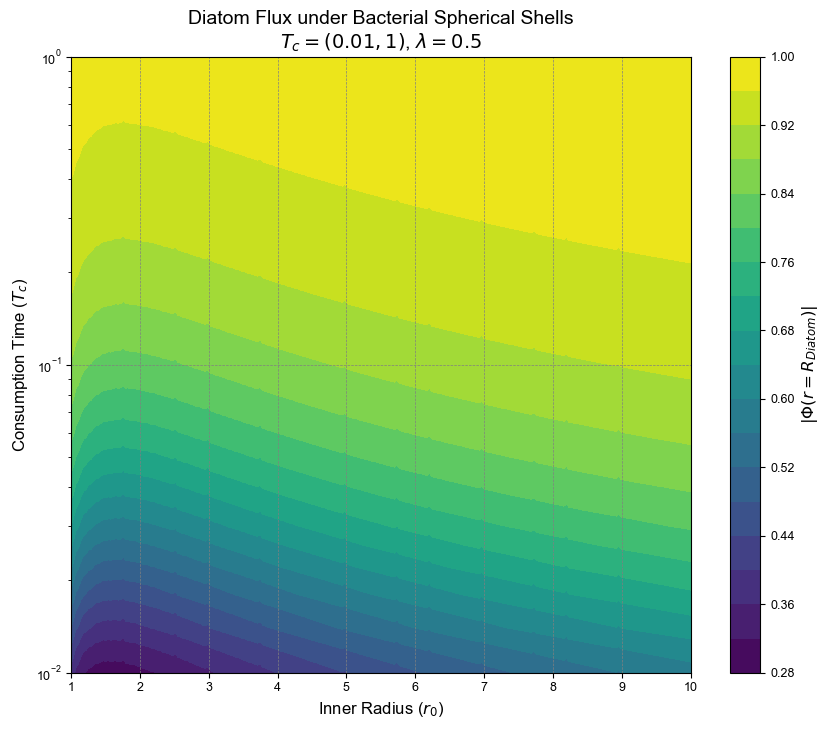

In [4]:
FM_r0 = FluxMap3D(syst_params, layer_generator, set_logscale=False)
FM_r0.solve(n_jobs=-1)
FM_r0.plot(set_ylog=True)

### Iterate over radii $(r_0)$ \& Comsumption Times $(T_c)$

ODEs solved:   0%|          | 0/62500 [00:00<?, ?it/s]

ODEs solved:  43%|████▎     | 27152/62500 [01:47<02:16, 258.72it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 62500/62500 [04:30<00:00, 230.92it/s]


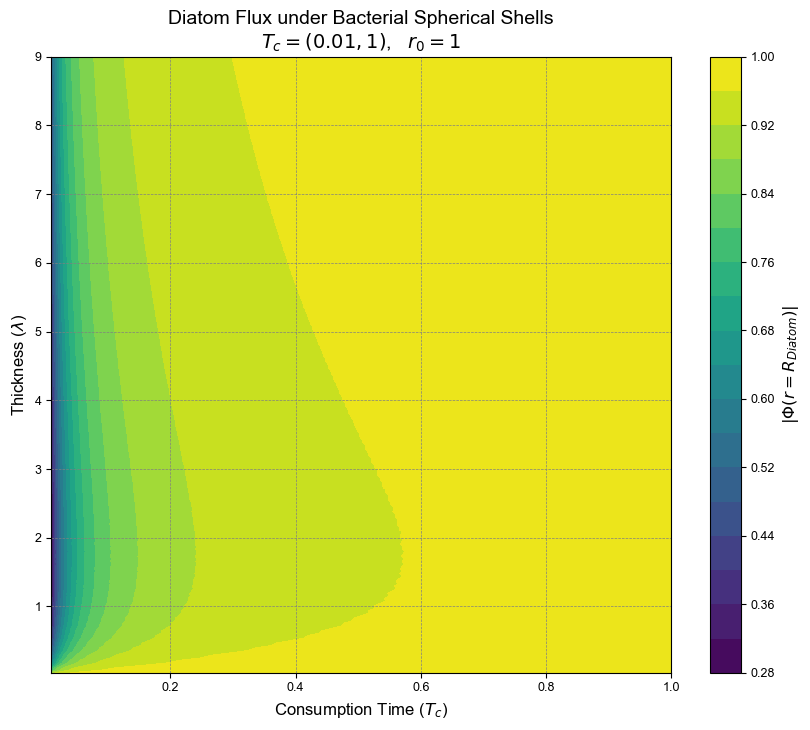

In [3]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': (0.01, 1), #  (1e-3, 1e3)
    'n_Tc' : 250,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_l': 250,
    'r0': 1
}

FM_r0 = FluxMap3D(syst_params, layer_generator)
FM_r0.solve(n_jobs=-1)
FM_r0.plot()

#### Logscaled

ODEs solved:   0%|          | 0/62500 [00:00<?, ?it/s]

ODEs solved: 100%|██████████| 62500/62500 [04:47<00:00, 217.17it/s]


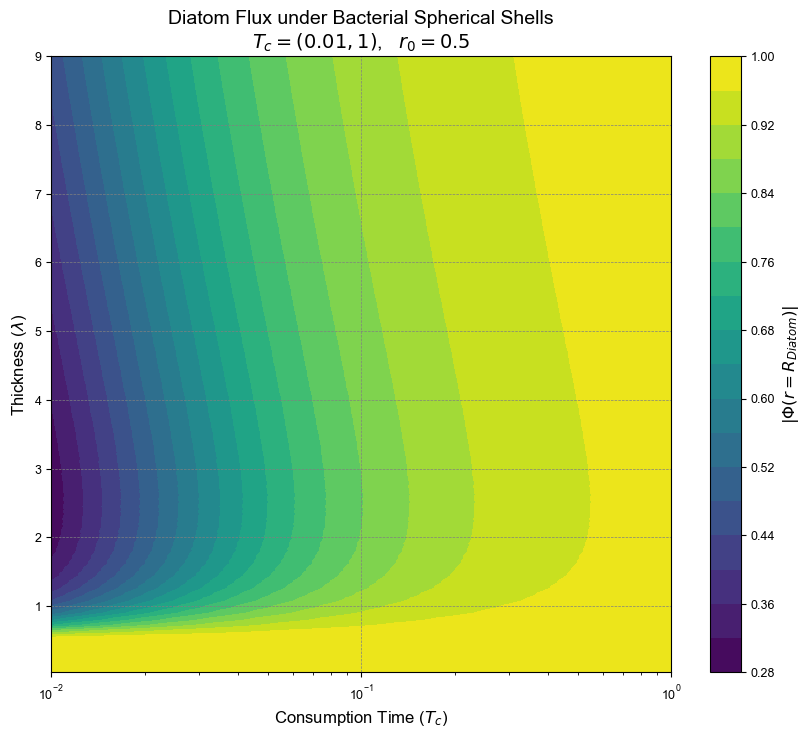

In [6]:
FM_l = FluxMap3D(syst_params, layer_generator, set_logscale=True)
FM_l.solve(n_jobs=-1)
FM_l.plot(set_xlog=True)

### Check $ \frac{\phi_a}{\phi_b} \Big|_{(r0,l)} = $ const

In [3]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': None,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_r0': 250,'n_l': 250
}

In [4]:
syst_params['Tc'] = 1e-2

FM_a = FluxMap3D(syst_params, layer_generator)
FM_a.solve(n_jobs=-1)
phi_a = FM_a.flux_map

ODEs solved:  70%|██████▉   | 21776/31126 [00:50<00:22, 423.84it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 31126/31126 [01:24<00:00, 369.99it/s]


In [5]:
syst_params['Tc'] = 1

FM_b = FluxMap3D(syst_params, layer_generator)
FM_b.solve(n_jobs=-1)
phi_b = FM_b.flux_map

ODEs solved: 100%|██████████| 31126/31126 [02:22<00:00, 218.14it/s]


In [20]:
phi_a[phi_a == 0] = np.nan
phi_b[phi_b == 0] = np.nan

phi_a/phi_b

array([[0.8860973 , 0.7707567 , 0.72418894, ..., 0.4730878 , 0.47364898,
        0.4748439 ],
       [0.69046465, 0.67089068, 0.60383214, ..., 0.47363565,        nan,
               nan],
       [0.6645125 , 0.5807907 , 0.52893908, ...,        nan,        nan,
               nan],
       ...,
       [0.56240191, 0.59509755,        nan, ...,        nan,        nan,
               nan],
       [0.6318744 ,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

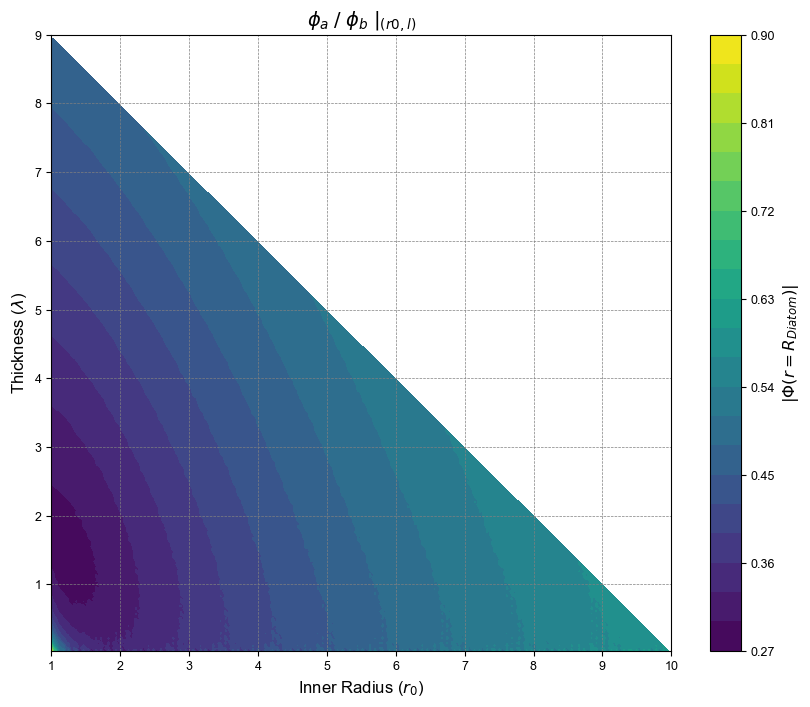

In [40]:
FM = FluxMap3D(syst_params, None)
FM.title = r'$\phi_a \; / \; \phi_b \; |_{(r0,l)}$'
FM.flux_map = phi_a / phi_b

FM.plot()

phi != phi(tc) psi(l,r)